In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [ ]:
#!unzip /content/drive/MyDrive/Dog_breed.zip
#!unzip /content/drive/MyDrive/cat_breed.zip

In [ ]:
df_full = pd.read_csv('/content/drive/MyDrive/df_full_cats_dogs.csv')

In [ ]:
df_full = df_full.drop(['Labels'], axis=1)
df_full

,Unnamed: 0,Imagepath,Animal
0,0,/content/train/b9f96dd0c9f3dc7e755d9b8cbb124f3...,1
1,1,/content/train/f706682a30021cc74cd9416dac25e94...,1
2,2,/content/train/8f3e10fab6ea57479f91a5c6efc1135...,1
3,3,/content/train/65a3a8d1011f95e937d77e3a79700da...,1
4,4,/content/train/324759773574e9bd6d6ba9c58e1550f...,1
...,...,...,...
56192,45970,/content/cat_breed/American Bobtail/22833651_3...,0
56193,45971,/content/cat_breed/American Bobtail/18490404_4...,0
56194,45972,/content/cat_breed/American Bobtail/37275567_1...,0
56195,45973,/content/cat_breed/American Bobtail/20529323_4...,0


In [ ]:
df = df_full[['Imagepath','Animal']].copy()

In [ ]:
df

,Imagepath,Animal
0,/content/train/b9f96dd0c9f3dc7e755d9b8cbb124f3...,1
1,/content/train/f706682a30021cc74cd9416dac25e94...,1
2,/content/train/8f3e10fab6ea57479f91a5c6efc1135...,1
3,/content/train/65a3a8d1011f95e937d77e3a79700da...,1
4,/content/train/324759773574e9bd6d6ba9c58e1550f...,1
...,...,...
56192,/content/cat_breed/American Bobtail/22833651_3...,0
56193,/content/cat_breed/American Bobtail/18490404_4...,0
56194,/content/cat_breed/American Bobtail/37275567_1...,0
56195,/content/cat_breed/American Bobtail/20529323_4...,0


In [ ]:
df["Animal"] = df["Animal"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 x_col='Imagepath',y_col='Animal',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,  
    x_col='Imagepath',
    y_col='Animal',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = train_datagen.flow_from_dataframe(train_df,
                                                 x_col='Imagepath',y_col='Animal',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 44957 validated image filenames belonging to 2 classes.
Found 11240 validated image filenames belonging to 2 classes.
Found 44957 validated image filenames belonging to 2 classes.


In [ ]:
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
2997/2997 [==============================] - 385s 123ms/step - loss: 0.3825 - accuracy: 0.8537 - val_loss: 2.3010 - val_accuracy: 0.2680 - lr: 0.0010
Epoch 2/10
2997/2997 [==============================] - 355s 119ms/step - loss: 0.2664 - accuracy: 0.8989 - val_loss: 1.3793 - val_accuracy: 0.4086 - lr: 0.0010
Epoch 3/10
2997/2997 [==============================] - 345s 115ms/step - loss: 0.2396 - accuracy: 0.9096 - val_loss: 0.2507 - val_accuracy: 0.9022 - lr: 0.0010
Epoch 4/10
2997/2997 [==============================] - 347s 116ms/step - loss: 0.2198 - accuracy: 0.9178 - val_loss: 0.6907 - val_accuracy: 0.6525 - lr: 0.0010
Epoch 5/10
2997/2997 [==============================] - 359s 120ms/step - loss: 0.2044 - accuracy: 0.9241 - val_loss: 0.5799 - val_accuracy: 0.7411 - lr: 0.0010
Epoch 6/10
2997/2997 [==============================] - 357s 119ms/step - loss: 0.1931 - accuracy: 0.9306 - val_loss: 0.2319 - val_accuracy: 0.9063 - lr: 0.0010
Epoch 7/10
2997/2997 [============

# **LOADING THE MODEL & SAVING THE MODEL**

In [ ]:
from keras.models import model_from_json
model_cat_vs_dog_json = model.to_json()
with open("/content/drive/MyDrive/model_cat_vs_dog1.json", "w") as json_file:
    json_file.write(model_cat_vs_dog_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/model_cat_vs_dog1.h5")
print("Saved model to disk")

'''
LOADING THE WEIGHTS OF THE DEEP LEARNING NETWORK
# load json and create model
json_file = open('model_cat.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
'''

Saved model to disk


'\nLOADING THE WEIGHTS OF THE DEEP LEARNING NETWORK\n# load json and create model\njson_file = open(\'model_cat.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n# load weights into new model\nloaded_model.load_weights("model.h5")\nprint("Loaded model from disk")\n'

# **LOADING THE HISTORY & SAVING THE HISTORY**

In [ ]:
#SAVING THE HISTORY

np.save('/content/drive/MyDrive/my_history_cat_dog.npy',history.history)

#Loading the history

#history=np.load('/content/drive/MyDrive/my_history_cat_dog.npy',allow_pickle='TRUE').item()

# **ACCURACY VISUALIZATION**

In [ ]:
import plotly.graph_objects as go
from IPython.display import display, Image
plt.clf()
fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history.history['accuracy'],
                    name='Train'))

fig.add_trace(go.Scatter(
                    y=history.history['val_accuracy'],
                    name='Valid'))


fig.update_layout(height=450, 
                  width=600,
                  title='Accuracy for Cat breed',
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy')

fig.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.clf()
fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history.history['loss'],
                    name='LOSS'))

fig.add_trace(go.Scatter(
                    y=history.history['val_loss'],
                    name='VAL_LOSS'))


fig.update_layout(height=450, 
                  width=600,
                  title='LOSS for Cat breed',
                  xaxis_title='Epoch',
                  yaxis_title='LOSS')


fig.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
df

,Imagepath,Animal
0,/content/train/b9f96dd0c9f3dc7e755d9b8cbb124f3...,dog
1,/content/train/f706682a30021cc74cd9416dac25e94...,dog
2,/content/train/8f3e10fab6ea57479f91a5c6efc1135...,dog
3,/content/train/65a3a8d1011f95e937d77e3a79700da...,dog
4,/content/train/324759773574e9bd6d6ba9c58e1550f...,dog
...,...,...
56192,/content/cat_breed/American Bobtail/22833651_3...,cat
56193,/content/cat_breed/American Bobtail/18490404_4...,cat
56194,/content/cat_breed/American Bobtail/37275567_1...,cat
56195,/content/cat_breed/American Bobtail/20529323_4...,cat


In [ ]:
train_df,test_df = train_test_split(df,test_size=0.10,
  random_state=15)

In [ ]:
test_df

,Imagepath,Animal
43550,/content/cat_breed/Torbie/29322321_9800.jpg,cat
17193,/content/cat_breed/Tabby/46127685_8568.jpg,cat
29112,/content/cat_breed/Dilute Tortoiseshell/304766...,cat
18622,/content/cat_breed/Tabby/46514657_22856.jpg,cat
28251,/content/cat_breed/Dilute Tortoiseshell/459674...,cat
...,...,...
53751,/content/cat_breed/Manx/40124344_2161.jpg,cat
14398,/content/cat_breed/Ragdoll/22093596_7239.jpg,cat
41368,/content/cat_breed/Dilute Calico/33591660_6473...,cat
9127,/content/train/1d114c4409c9cba464f762b11ce47d5...,dog


In [ ]:
train_df

,Imagepath,Animal
49524,/content/cat_breed/Siamese/45998080_3612.jpg,cat
7846,/content/train/339b364c38154241070ef70a6769fbe...,dog
31399,/content/cat_breed/Tuxedo/46460970_28737.jpg,cat
30183,/content/cat_breed/Snowshoe/34323435_3656.jpg,cat
21331,/content/cat_breed/Bengal/42656471_1704.jpg,cat
...,...,...
49015,/content/cat_breed/Tiger/42774684_4228.jpg,cat
2693,/content/train/19a8c1698819d382c3ead14bdc1a360...,dog
8076,/content/train/4b47fe23fa6972002789b8c68cdf739...,dog
52981,/content/cat_breed/Manx/41140776_1985.jpg,cat


In [ ]:
nb_samples = test_df.shape[0]
nb_samples

5620

In [ ]:
test_generator = test_datagen.flow_from_dataframe(test_df,
                                                 x_col='Imagepath',y_col='Animal',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 5620 validated image filenames belonging to 2 classes.


In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

In [ ]:
test_df

,Imagepath,Animal,category
43550,/content/cat_breed/Torbie/29322321_9800.jpg,cat,0
17193,/content/cat_breed/Tabby/46127685_8568.jpg,cat,0
29112,/content/cat_breed/Dilute Tortoiseshell/304766...,cat,0
18622,/content/cat_breed/Tabby/46514657_22856.jpg,cat,0
28251,/content/cat_breed/Dilute Tortoiseshell/459674...,cat,0
...,...,...,...
53751,/content/cat_breed/Manx/40124344_2161.jpg,cat,0
14398,/content/cat_breed/Ragdoll/22093596_7239.jpg,cat,0
41368,/content/cat_breed/Dilute Calico/33591660_6473...,cat,0
9127,/content/train/1d114c4409c9cba464f762b11ce47d5...,dog,0


In [ ]:
sample_test = test_df.head(18)
sample_test = sample_test.reset_index(drop=True)
sample_test.head()

,Imagepath,Animal,category
0,/content/cat_breed/Torbie/29322321_9800.jpg,cat,0
1,/content/cat_breed/Tabby/46127685_8568.jpg,cat,0
2,/content/cat_breed/Dilute Tortoiseshell/304766...,cat,0
3,/content/cat_breed/Tabby/46514657_22856.jpg,cat,0
4,/content/cat_breed/Dilute Tortoiseshell/459674...,cat,0


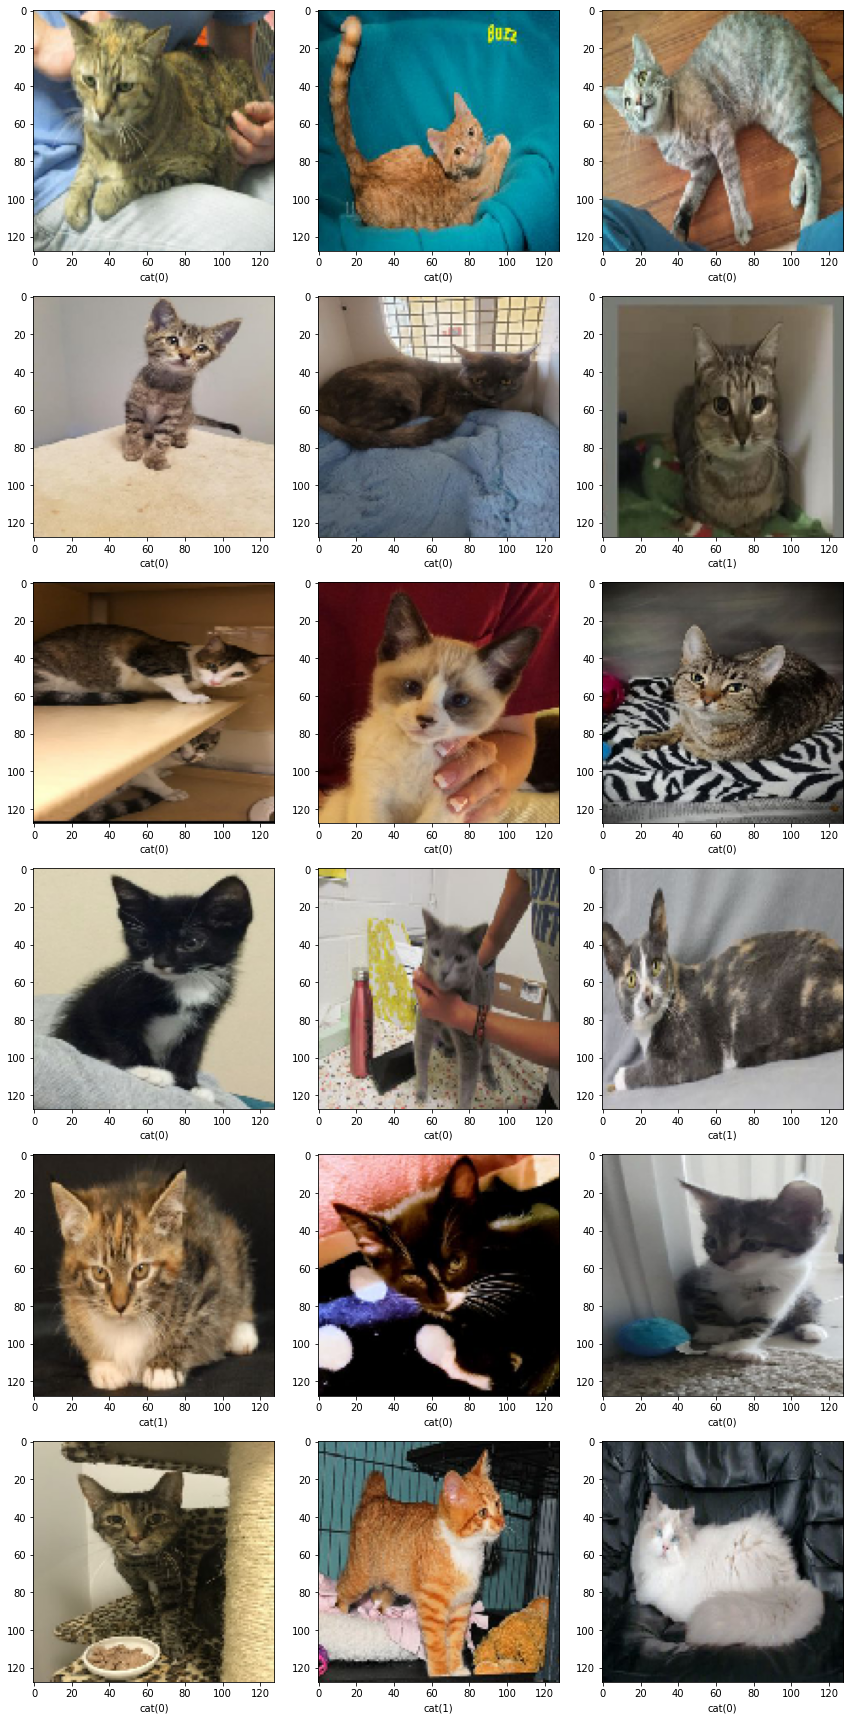

In [ ]:
sample_test = test_df.head(18)
sample_test = sample_test.reset_index(drop=True)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Imagepath']
    category = row['category']
    img = load_img(filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(row['Animal'] + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
test_df["Animal"].replace({"cat": 0,'dog': 1}, inplace = True)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cr_dog_cat = classification_report(test_df["Animal"], test_df["category"])


In [ ]:
print(cr_dog_cat)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      4578
           1       0.16      0.11      0.13      1042

    accuracy                           0.73      5620
   macro avg       0.49      0.49      0.49      5620
weighted avg       0.69      0.73      0.71      5620



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(test_df["Animal"], test_df["category"])


array([[3974,  604],
       [ 923,  119]])